In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [2]:
from sklearn.neural_network import MLPClassifier

In [3]:
from ae_feature_extractor import autoencoder
ae = autoencoder ()

## Chest and Wrist Physio modalities classification

In [6]:
# use chest and wrist features for classification
scores_all = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("features/test/feat_loso" + str(sid) + ".pkl"))
    
    y = feat[:,-1]
    x = feat[:,:-1]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,:-1]
    x_test = StandardScaler().fit_transform(x_test)
    
    clf = MLPClassifier(activation = 'tanh', hidden_layer_sizes=10,learning_rate_init=0.1, max_iter=5000,random_state=42,solver='adam')
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_all.append([sid, acc, f1])
    cms.append(cm)

subject  2
accuracy:  0.8151815181518152
f1 score:  0.8214698173077263

subject  3
accuracy:  0.8249767873723306
f1 score:  0.8253814417393421

subject  4
accuracy:  0.7792147806004619
f1 score:  0.7601707738764931

subject  5
accuracy:  0.9404600811907984
f1 score:  0.9411792509153375

subject  6
accuracy:  0.8960036330608537
f1 score:  0.8974452257613349

subject  7
accuracy:  0.813466787989081
f1 score:  0.7843111838875296

subject  8
accuracy:  0.6512681159420289
f1 score:  0.6579392367813832

subject  9
accuracy:  0.9604005461993628
f1 score:  0.9602843652073865

subject  10
accuracy:  0.7483530961791831
f1 score:  0.7171758641281438

subject  11
accuracy:  0.913336326897171
f1 score:  0.9151549894128693

subject  13
accuracy:  0.8342318059299192
f1 score:  0.8353637439573125

subject  14
accuracy:  0.6286484059272563
f1 score:  0.6427907513310762

subject  15
accuracy:  0.8302731751007613
f1 score:  0.7887910352618547

subject  16
accuracy:  0.9918955425484016
f1 score:  0.991897

In [7]:
np.array(scores_all)[:,1].mean() #accuracy

0.8213435656892657

In [8]:
np.array(scores_all)[:,1].std()

0.10544645739657146

In [9]:
np.array(scores_all)[:,2].mean() #f1-score

0.8152795424542474

In [10]:
np.array(scores_all)[:,2].std()

0.10642893647659843

### Confusion Matrices per subject and for all subjects combined

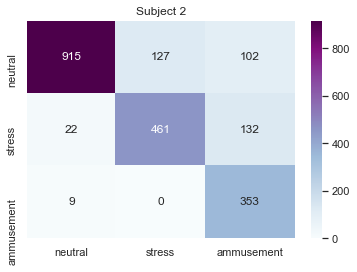

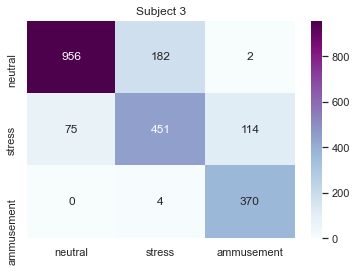

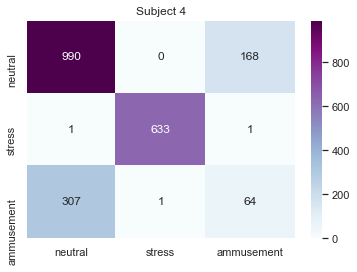

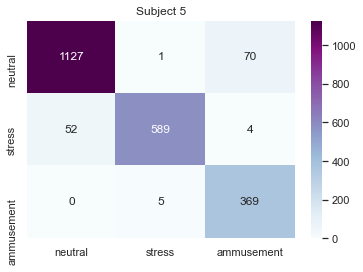

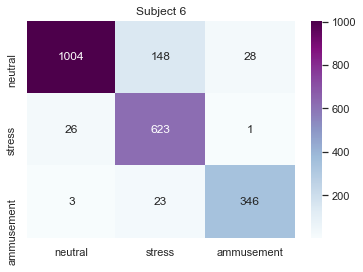

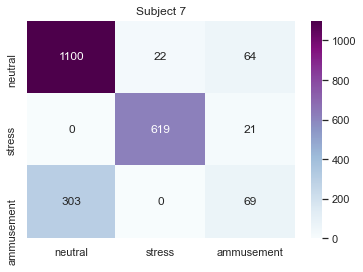

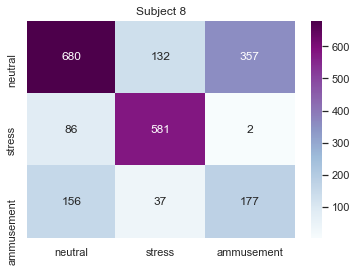

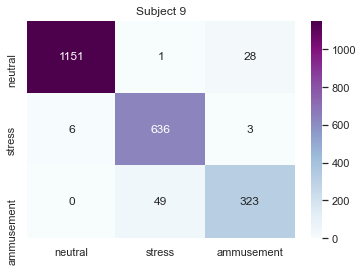

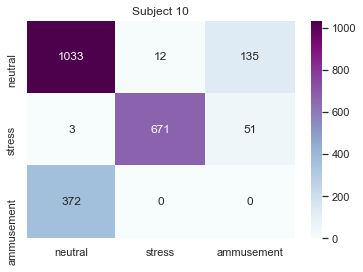

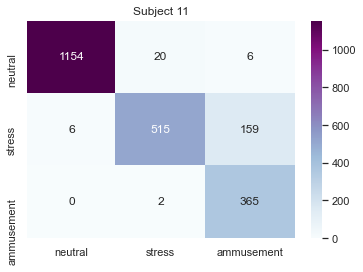

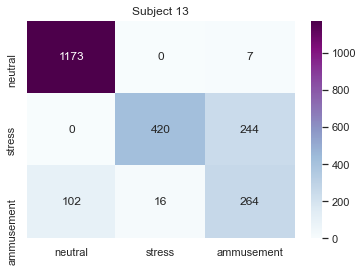

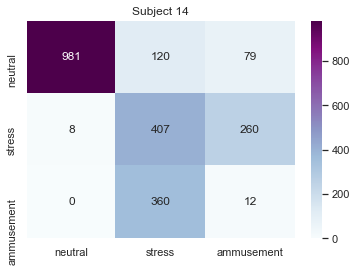

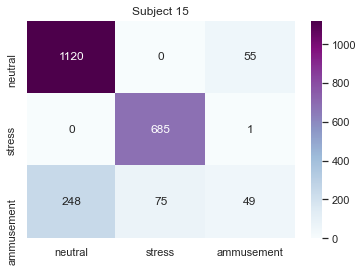

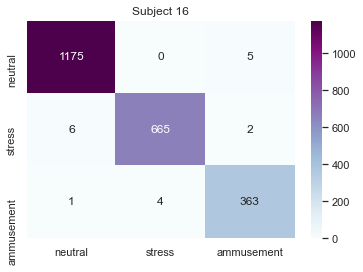

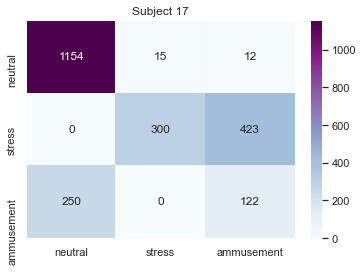

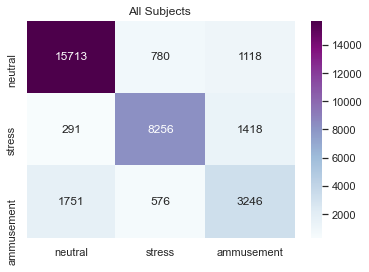

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_all)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()


## Chest only physio modalities classification

In [12]:
# use chest only features for classification
scores_c = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("features/test/feat_loso" + str(sid) + ".pkl"))
    
    y = feat[:,-1]
    x = feat[:,:80]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,:80]
    x_test = StandardScaler().fit_transform(x_test)
    
    clf = MLPClassifier(activation = 'tanh', hidden_layer_sizes=10,learning_rate_init=0.1, max_iter=5000,random_state=42,solver='adam')
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_c.append([sid, acc, f1])
    cms.append(cm)

subject  2
accuracy:  0.6416784535596417
f1 score:  0.6382891009833143

subject  3
accuracy:  0.6880222841225627
f1 score:  0.6866519899681988

subject  4
accuracy:  0.8272517321016166
f1 score:  0.7537012996967103

subject  5
accuracy:  0.8367162832656744
f1 score:  0.8305400007185818

subject  6
accuracy:  0.8642143505903724
f1 score:  0.8648552652489891

subject  7
accuracy:  0.7970882620564149
f1 score:  0.7596020850611992

subject  8
accuracy:  0.4723731884057971
f1 score:  0.4798762542110667

subject  9
accuracy:  0.83340919435594
f1 score:  0.7921572227259766

subject  10
accuracy:  0.7790953008344312
f1 score:  0.7531298160927199

subject  11
accuracy:  0.8810058374494836
f1 score:  0.8826862311481543

subject  13
accuracy:  0.8261455525606469
f1 score:  0.7594164574859369

subject  14
accuracy:  0.7238437359676695
f1 score:  0.7324968196237074

subject  15
accuracy:  0.8275862068965517
f1 score:  0.7545132139015105

subject  16
accuracy:  0.9230076542098155
f1 score:  0.921966

In [13]:
np.array(scores_c)[:,1].mean() #accuracy

0.7884356464790035

In [14]:
np.array(scores_c)[:,1].std()

0.11275236012704244

In [15]:
np.array(scores_c)[:,2].mean() #f1-score

0.7678878038261249

In [16]:
np.array(scores_c)[:,2].std()

0.10921721080214283

### Confusion Matrices per subject and for all subjects combined

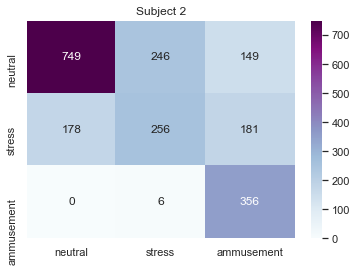

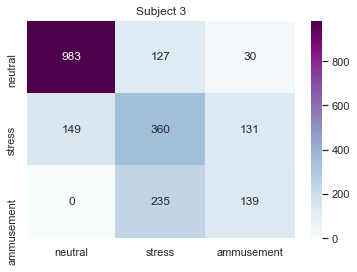

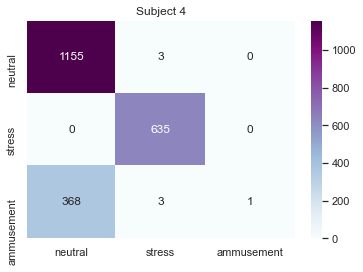

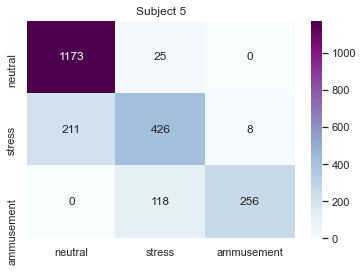

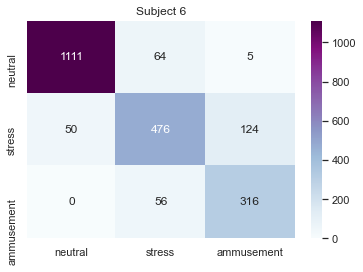

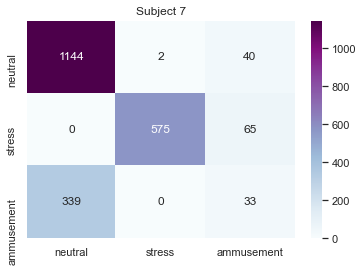

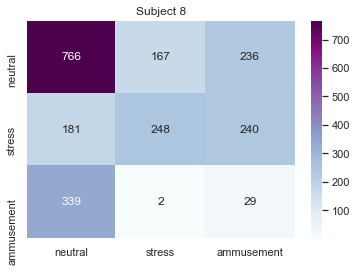

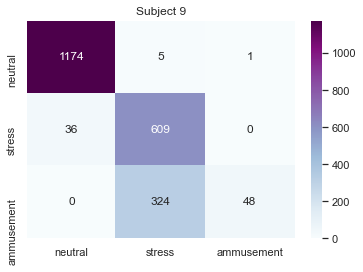

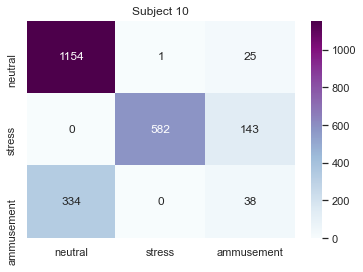

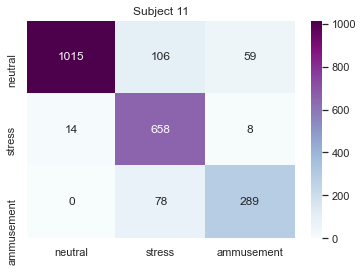

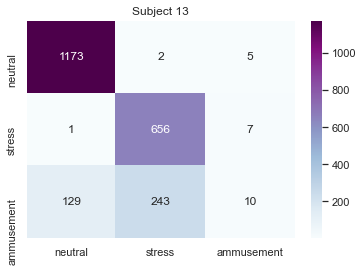

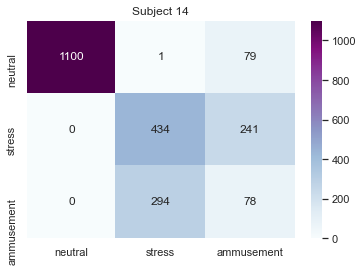

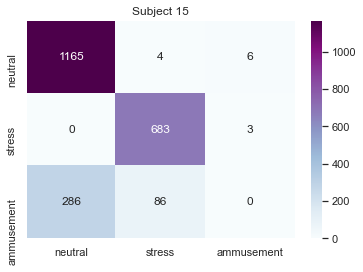

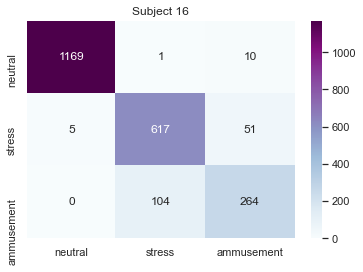

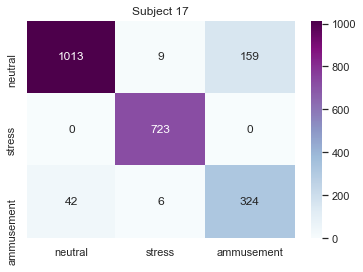

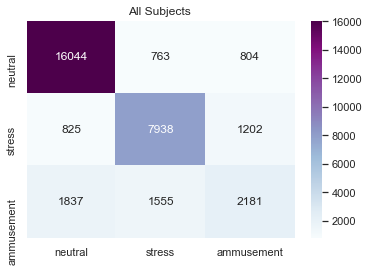

In [17]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_c)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Wrist only physio modalities classification

In [18]:
# use wrist only features for classification
scores_w = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("features/test/feat_loso" + str(sid) + ".pkl"))
    
    y = feat[:,-1]
    x = feat[:,80:-1]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,80:-1]
    x_test = StandardScaler().fit_transform(x_test)
    
    clf = MLPClassifier(activation = 'tanh', hidden_layer_sizes=10,learning_rate_init=0.1, max_iter=5000,random_state=42,solver='adam')
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_w.append([sid, acc, f1])
    cms.append(cm)

subject  2
accuracy:  0.7751060820367751
f1 score:  0.7508127687642576

subject  3
accuracy:  0.6564531104921077
f1 score:  0.6145500152502014

subject  4
accuracy:  0.8069284064665126
f1 score:  0.7502086358992311

subject  5
accuracy:  0.7280108254397835
f1 score:  0.7109130510222867

subject  6
accuracy:  0.7815622161671208
f1 score:  0.7720800016586046

subject  7
accuracy:  0.8111919927206551
f1 score:  0.8172642617552848

subject  8
accuracy:  0.8102355072463768
f1 score:  0.75100235471457

subject  9
accuracy:  0.8461538461538461
f1 score:  0.831412511795122

subject  10
accuracy:  0.660518225735617
f1 score:  0.657038836459775

subject  11
accuracy:  0.6861248316120341
f1 score:  0.6780078065413861

subject  13
accuracy:  0.7300089847259659
f1 score:  0.6988201444679337

subject  14
accuracy:  0.3403682083520431
f1 score:  0.3338493425441075

subject  15
accuracy:  0.6112852664576802
f1 score:  0.6054315676638237

subject  16
accuracy:  0.7343538946420531
f1 score:  0.746581817

In [20]:
np.array(scores_w)[:,1].mean() #accuracy

0.6836735202815978

In [21]:
np.array(scores_w)[:,1].std()

0.16091831140567722

In [22]:
np.array(scores_w)[:,1].mean() #f1-score

0.6836735202815978

In [23]:
np.array(scores_w)[:,1].std()

0.16091831140567722

### Confusion Matrices per subject and for all subjects combined

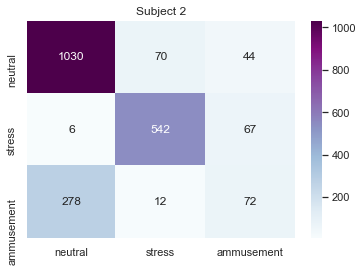

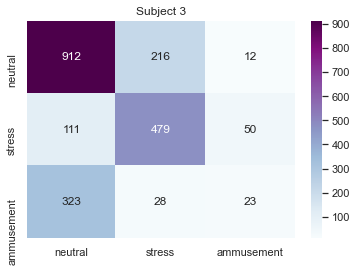

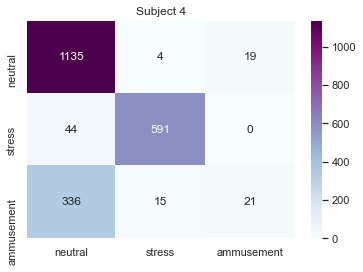

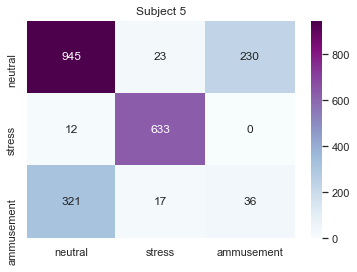

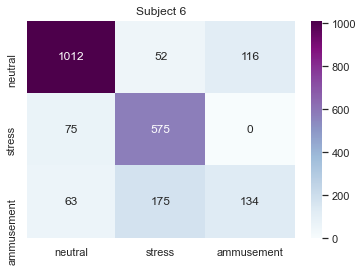

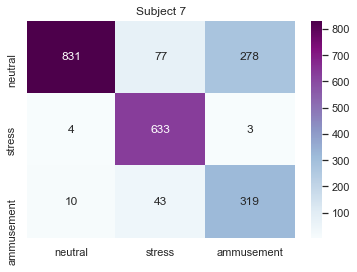

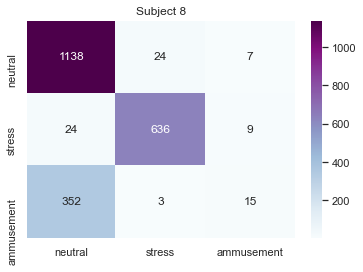

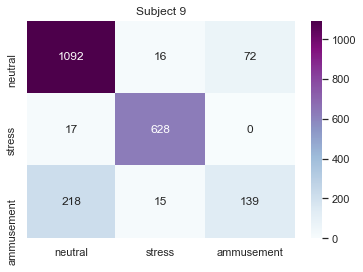

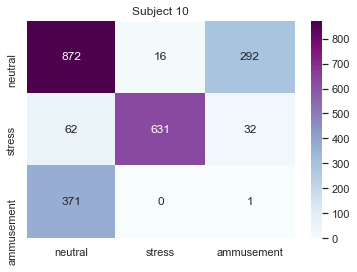

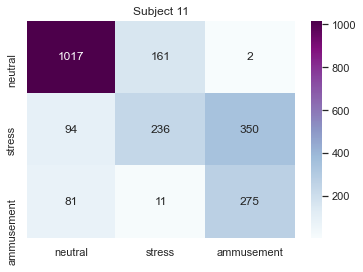

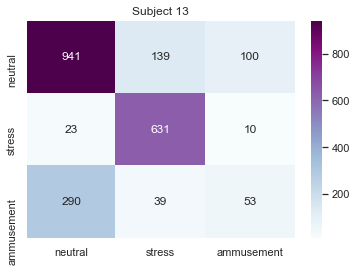

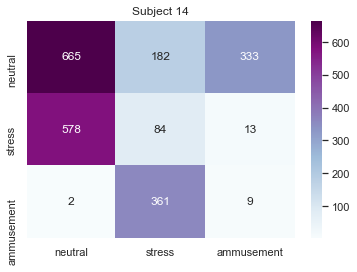

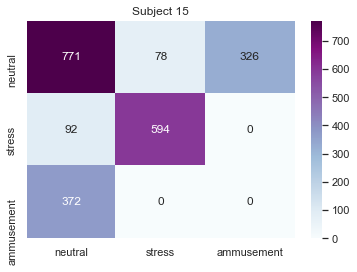

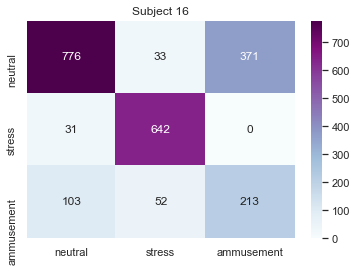

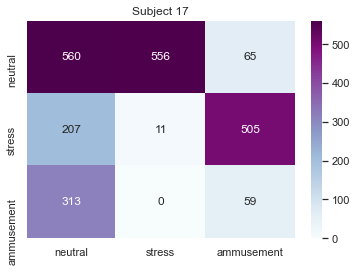

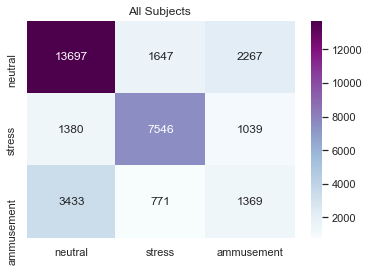

In [24]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_w)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Accuracies plot

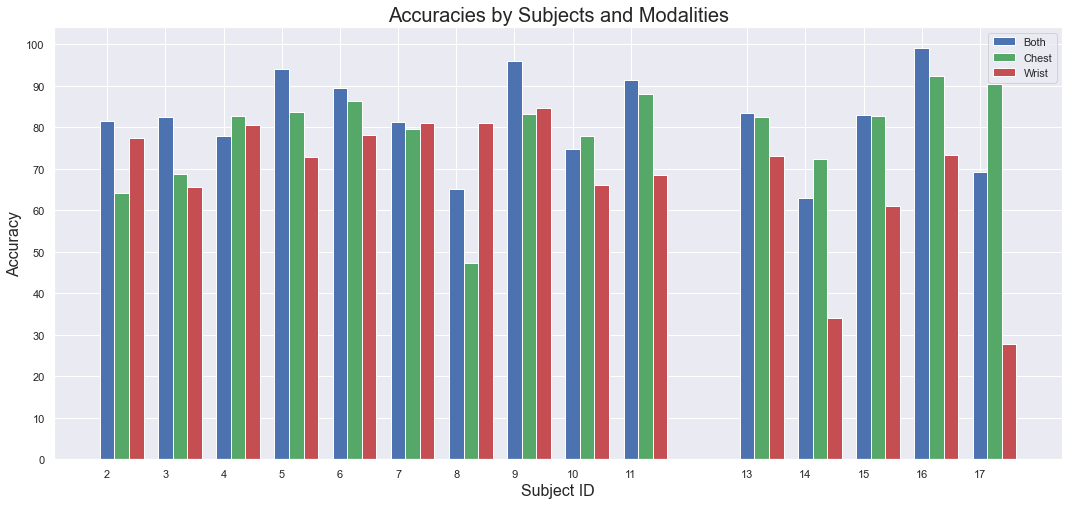

In [25]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("Accuracies by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,1]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,1]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,1]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])


## F1-score plot

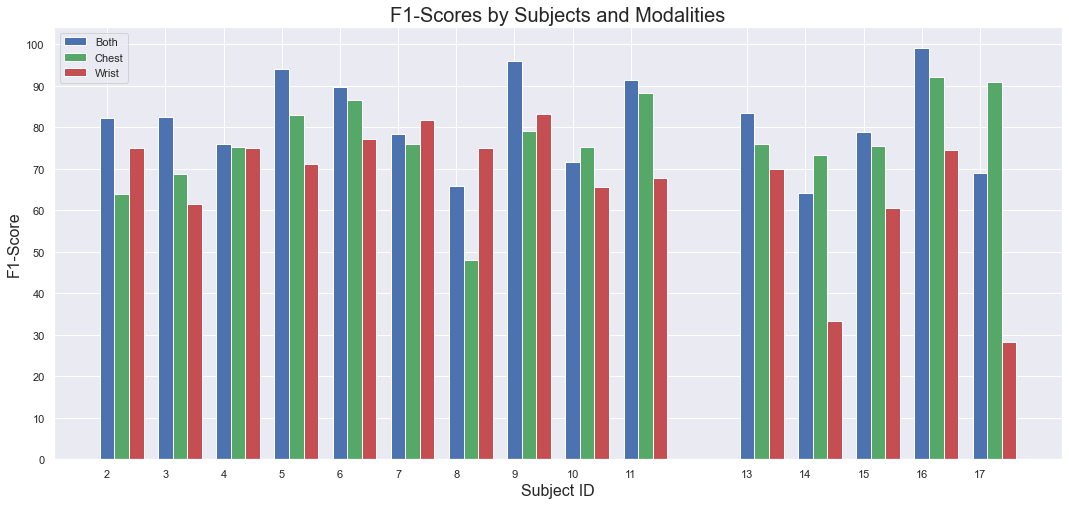

In [26]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('F1-Score', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("F1-Scores by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,2]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,2]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,2]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])